In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy.spatial.distance import euclidean

myseed = 10
random.seed(myseed)
np.random.seed(myseed)

In [17]:
def square_f(x):
    return -(x**2)/95

def gaussian(x, mu=0, sigma=1):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

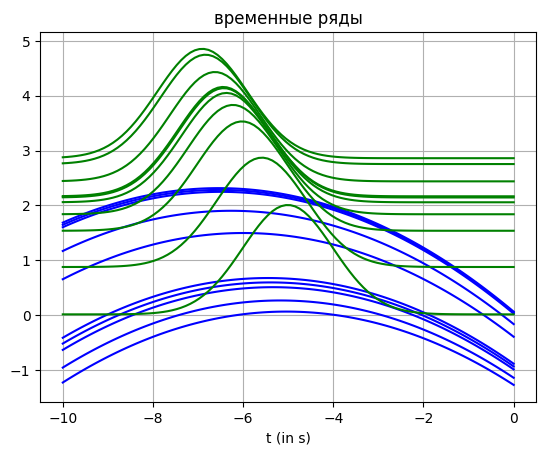

In [18]:
time_index = np.linspace(-10, 0, num=100)

tseries_list = []
arr_rand = np.random.random(size=20)

rand_const = np.random.randint(10, 20)
N = 10

for i in range(N):
    tseries_list.append(square_f(time_index + 2 * arr_rand[i] + 5) * 5 + arr_rand[i] * 3)
for i in range(N, 20):
   tseries_list.append(gaussian(time_index + 2 * arr_rand[i] + 5) * 5 + arr_rand[i] * 3)

for i in range(N):
    plt.plot(time_index, tseries_list[i], '-b')
for i in range(N, 20):
    plt.plot(time_index, tseries_list[i], '-g')

plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()

### Зашумление

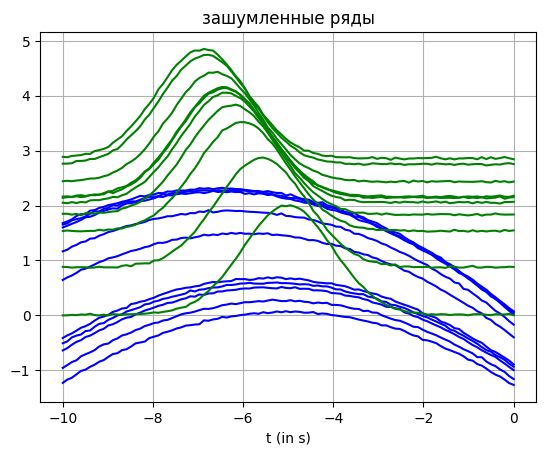

In [19]:
noise_std = 0.01 # Зашумление

for i in range(N):
    tseries_list[i] += np.random.normal(0, noise_std, size=len(time_index))
for i in range(N, 20):
    tseries_list[i] += np.random.normal(0, noise_std, size=len(time_index))

for i in range(N):
    plt.plot(time_index, tseries_list[i], '-b')
for i in range(N, 20):
    plt.plot(time_index, tseries_list[i], '-g')

plt.title(r'зашумленные ряды')
plt.xlabel(r't (in s)')
plt.grid()

In [20]:
def generate_candidates(Ti, min_len = 3, max_len = 100):
    candidates = []
    for l in range(min_len, max_len + 1):
        for i in range(len(Ti) - l + 1):
            subsequence = Ti[i:i + l]
            candidates.append(subsequence)
    return candidates

In [21]:
def distances_func(S, Wi_l):
    distances = [euclidean(S, candidate) for candidate in Wi_l]
    return distances

In [22]:
def candidates_func(DS):
    quality = np.mean(np.sqrt(DS))
    return quality

In [23]:
def insert_shapelet(rShapelets, shapelet):
    result = []
    i = 0
    for i in range(len(rShapelets)):
        if rShapelets[i][1] <= shapelet[1]:
            result += [rShapelets[i]]
        if rShapelets[i][1] > shapelet[1]:
            if i == 0 or rShapelets[i - 1][1] < shapelet[1]:
                result += [shapelet]
            else:
                result += [rShapelets[i - 1]]
    return result

In [24]:
def merge(k, kShapelets, shapelets):
    if len(kShapelets) == 0:
        return shapelets[0:k]
    result = kShapelets
    for shapelet in shapelets:
        if shapelet[1] < kShapelets[len(kShapelets) - 1][1]:
            kShapelets = insert_shapelet(result, shapelet)
    return result

In [25]:
def filter_shapelets(x, min = 0.05):
    result = []
    for xi in x:
        if xi[1] <= min:
            result += [xi]
    return result

In [26]:
def shapelet_selection(tseries_list, k = 50, min_len = 3, max_len = 100):
    kShapelets = []
    for tseries in tseries_list:
        shapelets = []
        for l in range(min_len, max_len + 1):
            candidates = generate_candidates(tseries, min_len, max_len)
            for candidate in candidates:
                distances = distances_func(candidate, candidates)
                quality = candidates_func(distances)
                shapelets.append((candidate, quality))
        shapelets = filter_shapelets(shapelets, quality)
        shapelets.sort(key=lambda x: x[1], reverse=True)
        kShapelets = merge(k, kShapelets, shapelets)
    return kShapelets

In [27]:
K_shapletes_laplace = shapelet_selection(tseries_list[0:10], k = 20, min_len= 4 , max_len= 4)
K_shapletes_gaussian = shapelet_selection(tseries_list[11:20], k = 20, min_len= 4 , max_len= 4)
print(K_shapletes_laplace)
print(K_shapletes_gaussian)

[(array([0.26542441, 0.2016171 , 0.13300348, 0.07507594]), 1.7352817116114965), (array([0.33090613, 0.26542441, 0.2016171 , 0.13300348]), 1.6960323385430893), (array([0.39208263, 0.33090613, 0.26542441, 0.2016171 ]), 1.6576607589403145), (array([0.46670766, 0.39208263, 0.33090613, 0.26542441]), 1.619533476313707), (array([0.52285116, 0.46670766, 0.39208263, 0.33090613]), 1.5831712547572179), (array([0.58120477, 0.52285116, 0.46670766, 0.39208263]), 1.5484819064917128), (array([0.65057079, 0.58120477, 0.52285116, 0.46670766]), 1.5132229693180477), (array([0.70532285, 0.65057079, 0.58120477, 0.52285116]), 1.48116582430338), (array([0.74603894, 0.70532285, 0.65057079, 0.58120477]), 1.4516296249622063), (array([0.80750907, 0.74603894, 0.70532285, 0.65057079]), 1.4222790958687823), (array([0.87963561, 0.80750907, 0.74603894, 0.70532285]), 1.3932762854281715), (array([0.93267461, 0.87963561, 0.80750907, 0.74603894]), 1.3647994736291982), (array([0.97289553, 0.93267461, 0.87963561, 0.80750907

In [28]:
import random

x = []
Y = []
shpletes_qual = K_shapletes_laplace + K_shapletes_gaussian

for i in range(len(shpletes_qual)):
    res = list(shpletes_qual[i][0]) + [shpletes_qual[i][1]]
    x.append(res)

    if i < len(K_shapletes_gaussian):
        Y.append(1)
    else:
        Y.append(2)

X_train = []
X_test = []
Y_train = []
Y_test = []

indexes = np.arange(len(Y))
random.shuffle(indexes)
for i in range(int(len(Y) * 0.7)):
    X_train.append(x[indexes[i] - 1])
    Y_train.append(Y[indexes[i] - 1])

for i in range(int(len(Y) * 0.7), len(Y)):
    X_test.append(x[indexes[i] - 1])
    Y_test.append(Y[indexes[i] - 1])

Y_train, Y_test

([2,
  1,
  1,
  2,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  1,
  1,
  1,
  2,
  1,
  2,
  2,
  1,
  1,
  2,
  1,
  1,
  1,
  1],
 [1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2])

In [29]:
from pyts.classification import TimeSeriesForest

clf = TimeSeriesForest(random_state=42)
clf.fit(X_train, Y_train)

print(f"Accuracy {clf.score(X_test, Y_test)}")
for i in range(len(Y_test)):
    print(f"{i + 1} объект:")
    x_test_np = np.array(X_test[i]).reshape(1, -1)
    print(f"Вектор вероятности принадлежности к классам: {clf.predict_proba(x_test_np)}")
    print(f"Истинный класс для предсказаний: {Y_test[i]}")

Accuracy 1.0
1 объект:
Вектор вероятности принадлежности к классам: [[1. 0.]]
Истинный класс для предсказаний: 1
2 объект:
Вектор вероятности принадлежности к классам: [[0. 1.]]
Истинный класс для предсказаний: 2
3 объект:
Вектор вероятности принадлежности к классам: [[1. 0.]]
Истинный класс для предсказаний: 1
4 объект:
Вектор вероятности принадлежности к классам: [[1. 0.]]
Истинный класс для предсказаний: 1
5 объект:
Вектор вероятности принадлежности к классам: [[0. 1.]]
Истинный класс для предсказаний: 2
6 объект:
Вектор вероятности принадлежности к классам: [[0. 1.]]
Истинный класс для предсказаний: 2
7 объект:
Вектор вероятности принадлежности к классам: [[0.998 0.002]]
Истинный класс для предсказаний: 1
8 объект:
Вектор вероятности принадлежности к классам: [[0. 1.]]
Истинный класс для предсказаний: 2
9 объект:
Вектор вероятности принадлежности к классам: [[0. 1.]]
Истинный класс для предсказаний: 2
10 объект:
Вектор вероятности принадлежности к классам: [[0. 1.]]
Истинный класс 

### Итог: классификатор успешно справился с определением класса